In [2]:
import pandas as pd

In [3]:
import requests

In [4]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')
#This is how I use request

In [5]:
response
#The response code is 200 this means we have attained success!

<Response [200]>

In [6]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')
print(response)
#This is how I print the response code

<Response [200]>


In [7]:
response.text
#This is how I get the text from a website
#It doesn't look reader friendly though

'<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    \n    \n\n    <title>CORGIS Datasets Project</title>\n    <meta name="description" content="\n\n\n\n\n\n\n            Github Pages for CORGIS Datasets Project">\n    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">\n\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">\n    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">\n    <link rel="stylesheet" href="/corgis/assets/css/main.css">\n\n    \n\n    \n\n    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>\n    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"\n            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="\n            crossorigi

In [8]:
print(response.text)
#This looks prettier
#.text is added to access the text contained in response


<!DOCTYPE html>
<html lang="en-US">
    <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    
    

    <title>CORGIS Datasets Project</title>
    <meta name="description" content="






            Github Pages for CORGIS Datasets Project">
    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">

    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
    <link rel="stylesheet" href="/corgis/assets/css/main.css">

    

    

    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>
    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"
            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="
            crossorigin="anonymous"></script>

    <scr

In [9]:
#For Example a cube is an object
#The cube being thrown is a function

In [10]:
from bs4 import BeautifulSoup

In [11]:
#Save all the html in a string variable (Why is this done?)
#html_string is a variable name
html_string = response.text

In [12]:
# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

In [13]:
# This "document" variable is an object that has a "find" method
document.find('h3')

<h3>Aids</h3>

In [14]:
#This returns a list of all the datasets (So I could look into other datasets later)
document.find_all('h3')

[<h3>Aids</h3>,
 <h3>Airlines</h3>,
 <h3>Billionaires</h3>,
 <h3>Broadway</h3>,
 <h3>Business Dynamics</h3>,
 <h3>Cancer</h3>,
 <h3>Cars</h3>,
 <h3>Classics</h3>,
 <h3>Construction Permits</h3>,
 <h3>Construction Spending</h3>,
 <h3>County Demographics</h3>,
 <h3>Covid</h3>,
 <h3>Drugs</h3>,
 <h3>Earthquakes</h3>,
 <h3>Election</h3>,
 <h3>Electricity</h3>,
 <h3>Emissions</h3>,
 <h3>Energy</h3>,
 <h3>Finance</h3>,
 <h3>Food</h3>,
 <h3>Food Access</h3>,
 <h3>Global Development</h3>,
 <h3>Graduates</h3>,
 <h3>Health</h3>,
 <h3>Hospitals</h3>,
 <h3>Hydropower</h3>,
 <h3>Ingredients</h3>,
 <h3>Injuries</h3>,
 <h3>Labor</h3>,
 <h3>Medal Of Honor</h3>,
 <h3>Music</h3>,
 <h3>Opioids</h3>,
 <h3>Police Shootings</h3>,
 <h3>Publishers</h3>,
 <h3>Real Estate</h3>,
 <h3>Retail Services</h3>,
 <h3>School Scores</h3>,
 <h3>Skyscrapers</h3>,
 <h3>Slavery</h3>,
 <h3>State Crime</h3>,
 <h3>State Demographics</h3>,
 <h3>State Fragility</h3>,
 <h3>Suicide Attacks</h3>,
 <h3>Supreme Court</h3>,
 <h3>Tate</

In [15]:
#Step 3: Write a function that takes an element from the list of CORGIS datasets,
#searches the respective CORGIS page for the CSV download link,
#and returns a Pandas dataframe.

In [16]:
#The a needs to be lowercase since the linkname of all these datasets is lowercase

In [17]:
def pdcorgis(a):
    a= a.lower()
    response=requests.get('https://corgis-edu.github.io/corgis/csv/' + a + '/') #This is done to request
    #information from the link that holds datasets
    html_string = response.text #This is done to create a variable that stores the text
    document = BeautifulSoup(html_string, 'html.parser') #The variable called document stores
    #elements of html which is a long string within html_string. BeautifulSoup uses 
    # 'html.parser' to do the parsing. 
    listoflinks = document.find_all('a') #This helps me find the tag 'a'
    #print(listoflinks) #This is done so you could print any dataset within the corgis


    for x in listoflinks:
        if x.has_attr('download') == True: #We look at all elements in the list the if function
        #Only selects the link with the download
            mylink = x['href'] #This directs to the download link of the csv file
            newdf = pd.read_csv('https://corgis-edu.github.io/corgis/csv/' + a + '/' + mylink)
            
    return newdf

    


In [18]:
pdcorgis('airlines')
#Example of a dataset here


,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116


In [19]:
pdcorgis('airlines').columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')

In [20]:
x = pdcorgis('airlines')

In [21]:
x.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')

<AxesSubplot:xlabel='Airport.Name'>

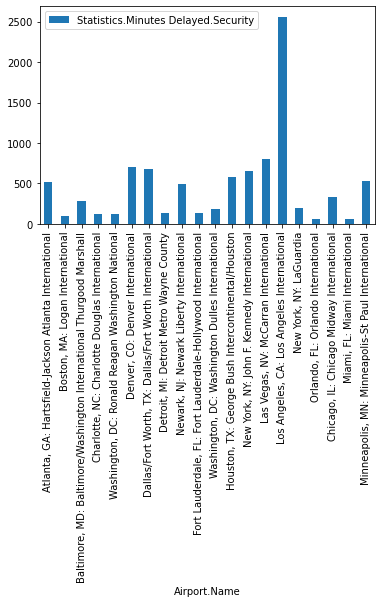

In [22]:
x.iloc[0:20].plot.bar(x='Airport.Name', y= 'Statistics.Minutes Delayed.Security') #Y must be numerical

In [23]:
#Drugs dataset

In [24]:
pdcorgis('drugs')

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,Rates.Alcohol.Use Disorder Past Year.12-17,Rates.Alcohol.Use Disorder Past Year.18-25,...,Totals.Marijuana.Used Past Year.26+,Rates.Marijuana.Used Past Year.12-17,Rates.Marijuana.Used Past Year.18-25,Rates.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,Rates.Tobacco.Use Past Month.12-17,Rates.Tobacco.Use Past Month.18-25,Rates.Tobacco.Use Past Month.26+
0,Alabama,2002,380805,499453,2812905,18,68,138,0.048336,0.136490,...,141,0.127535,0.237880,0.050275,63,226,930,0.166578,0.451976,0.330659
1,Alaska,2002,69400,62791,368460,4,12,27,0.061479,0.187891,...,46,0.188730,0.389026,0.124566,11,30,112,0.163918,0.484270,0.304220
2,Arizona,2002,485521,602265,3329482,36,117,258,0.073819,0.193626,...,215,0.169646,0.275435,0.064640,73,240,1032,0.151071,0.397968,0.309969
3,Arkansas,2002,232986,302029,1687337,14,53,101,0.061457,0.175913,...,104,0.157567,0.288856,0.061510,46,169,660,0.195714,0.558846,0.391210
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,0.141067,0.282887,0.078068,290,1377,4721,0.092235,0.351353,0.220699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Virginia,2018,629725,869285,5581639,10,82,267,0.015199,0.094035,...,518,0.096489,0.329603,0.092889,28,266,1234,0.045116,0.305545,0.221150
863,Washington,2018,545968,738052,5065742,11,75,282,0.020069,0.101770,...,1199,0.163818,0.454971,0.236665,20,163,1150,0.037481,0.220519,0.227040
864,West Virginia,2018,124659,174236,1235448,2,15,46,0.017428,0.087561,...,144,0.121996,0.330921,0.116328,10,70,438,0.081434,0.400053,0.354690
865,Wisconsin,2018,442510,615930,3861670,8,74,217,0.018720,0.120776,...,466,0.120078,0.326326,0.120566,17,157,917,0.038051,0.254571,0.237359


In [25]:
d=pdcorgis('drugs')

In [26]:
d.columns

Index(['State', 'Year', 'Population.12-17', 'Population.18-25',
       'Population.26+', 'Totals.Alcohol.Use Disorder Past Year.12-17',
       'Totals.Alcohol.Use Disorder Past Year.18-25',
       'Totals.Alcohol.Use Disorder Past Year.26+',
       'Rates.Alcohol.Use Disorder Past Year.12-17',
       'Rates.Alcohol.Use Disorder Past Year.18-25',
       'Rates.Alcohol.Use Disorder Past Year.26+',
       'Totals.Alcohol.Use Past Month.12-17',
       'Totals.Alcohol.Use Past Month.18-25',
       'Totals.Alcohol.Use Past Month.26+',
       'Rates.Alcohol.Use Past Month.12-17',
       'Rates.Alcohol.Use Past Month.18-25',
       'Rates.Alcohol.Use Past Month.26+',
       'Totals.Tobacco.Cigarette Past Month.12-17',
       'Totals.Tobacco.Cigarette Past Month.18-25',
       'Totals.Tobacco.Cigarette Past Month.26+',
       'Rates.Tobacco.Cigarette Past Month.12-17',
       'Rates.Tobacco.Cigarette Past Month.18-25',
       'Rates.Tobacco.Cigarette Past Month.26+',
       'Totals.Illicit Drug

<AxesSubplot:ylabel='Frequency'>

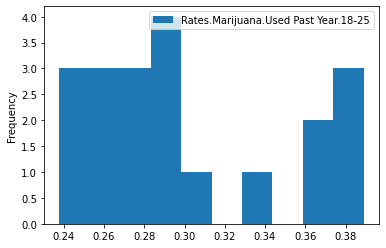

In [34]:
d.iloc[0:20].plot.hist(y= 'Rates.Marijuana.Used Past Year.18-25') #Y must be numerical

In [28]:
#Electricity Dataset

In [29]:
pdcorgis('Electricity')

,Utility.Number,Utility.Name,Utility.State,Utility.Type,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,...,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales,Retail.Total.Customers
0,34,City of Abbeville - (SC),SC,Municipal,13.7,10.8,7000.0,59000.0,0.0,66000.0,...,460.0,0.0,0.0,0.0,0.0,0.0,0.0,7536.0,58000.0,3844.0
1,55,City of Aberdeen - (MS),MS,Municipal,32.4,30.3,0.0,209454.0,0.0,209454.0,...,662.0,5638.0,120537.0,1.0,0.0,0.0,0.0,14797.0,204261.0,3229.0
2,59,City of Abbeville - (LA),LA,Municipal,28.9,22.0,0.0,137264.0,0.0,137264.0,...,887.0,3011.1,35881.0,27.0,0.0,0.0,0.0,12383.0,127579.0,5494.0
3,84,A & N Electric Coop,VA,Cooperative,154.0,162.4,596.0,743457.0,0.0,744053.0,...,4227.0,15516.0,176162.0,8.0,0.0,0.0,0.0,78507.0,704010.0,35934.0
4,87,City of Ada - (MN),MN,Municipal,2.1,2.2,0.0,20028.0,0.0,20028.0,...,255.0,190.0,2615.0,58.0,0.0,0.0,0.0,1593.0,20028.0,1185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,63169,Median Energy PA LLC,NJ,Retail Power Marketer,32.5,2.3,0.0,2102.0,0.0,2102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,2102.0,329.0
3170,63232,"National Gas & Electric, LLC",TX,Retail Power Marketer,120.0,150.0,0.0,157024.0,0.0,157024.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17466.8,157024.0,14982.0
3171,63364,"Mirabito Power & Gas, LLC",NY,Retail Power Marketer,0.0,0.0,0.0,3886.0,0.0,3886.0,...,526.0,73.7,1440.0,351.0,0.0,0.0,0.0,184.3,3601.0,877.0
3172,63367,Commercial Energy of California,CA,Retail Power Marketer,0.0,0.0,0.0,88429.0,0.0,88429.0,...,134.0,0.0,0.0,0.0,0.0,0.0,0.0,4810.1,88429.0,134.0


In [30]:
e=pdcorgis('Electricity')

In [31]:
e.columns

Index(['Utility.Number', 'Utility.Name', 'Utility.State', 'Utility.Type',
       'Demand.Summer Peak', 'Demand.Winter Peak', 'Sources.Generation',
       'Sources.Purchased', 'Sources.Other', 'Sources.Total', 'Uses.Retail',
       'Uses.Resale', 'Uses.No Charge', 'Uses.Consumed', 'Uses.Losses',
       'Uses.Total', 'Revenues.Retail', 'Revenue.Delivery', 'Revenue.Resale',
       'Revenue.Adjustments', 'Revenue.Transmission', 'Revenue.Other',
       'Revenue.Total', 'Retail.Residential.Revenue',
       'Retail.Residential.Sales', 'Retail.Residential.Customers',
       'Retail.Commercial.Revenue', 'Retail.Commercial.Sales',
       'Retail.Commercial.Customers', 'Retail.Industrial.Revenue',
       'Retail.Industrial.Sales', 'Retail.Industrial.Customers',
       'Retail.Transportation.Revenue', 'Retail.Transportation.Sales',
       'Retail.Transportation.Customers', 'Retail.Total.Revenue',
       'Retail.Total.Sales', 'Retail.Total.Customers'],
      dtype='object')

<AxesSubplot:xlabel='Utility.Name'>

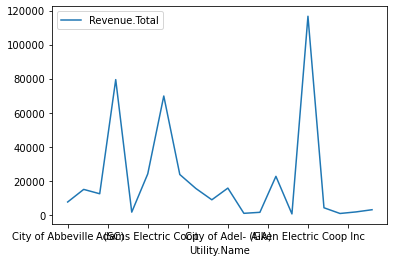

In [32]:
e.iloc[0:20].plot.line(x='Utility.Name', y= 'Revenue.Total') #Y must be numerical